##### OpenCV 單物件追蹤
這篇教學會介紹如何使用 OpenCV 裡的單物件追蹤功能 ( tracker )，並搭配 cv2.selectROI 選取需要追蹤的物體，就能即時進行該物件的追蹤。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 物件追蹤的八種演算法 
OpenCV 提供了八種物件追蹤的演算法，演算法的速度和精準度如下表所示：

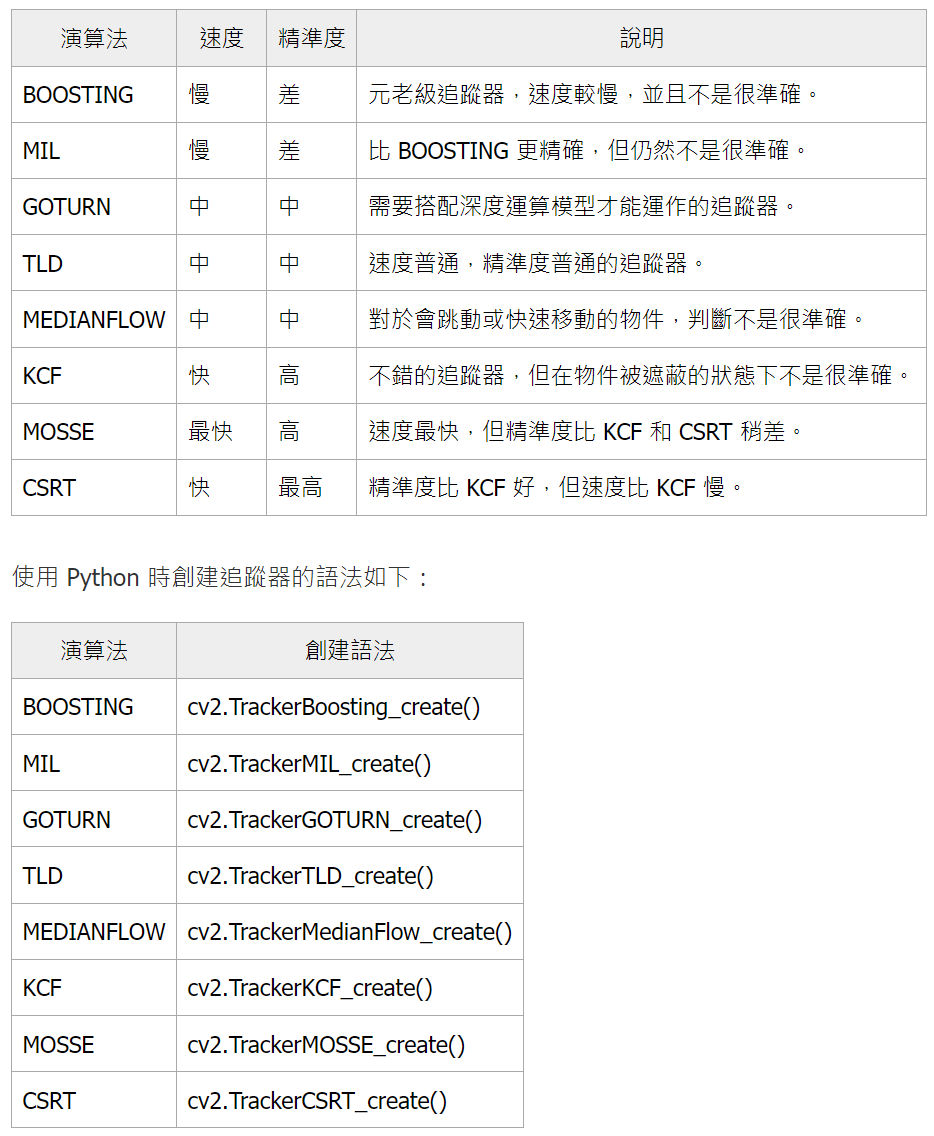

##### cv2.selectROI 選取特定區域 
要進行物件追蹤，必須先選取特定區域，OpenCV 內建 cv2.selectROI 方法可以進行選取的功能，使用方法如下：

In [ ]:
area = cv2.selectROI('視窗名稱', frame, showCrosshair=False, fromCenter=False)
# area：(x, y, width, height)
# frame：要選取的影像
# showCrosshair：選取框中間是否要有十字線，預設 True
# fromCenter：True 中心點選取，False 右上角選取

下方的程式碼執行後，按下鍵盤按鍵 a 就會進入選取模式，此時攝影機畫面會暫停，使用滑鼠拖拉選取後，按下 enter 鍵，\
就會回傳 xy 座標以及長寬尺寸。

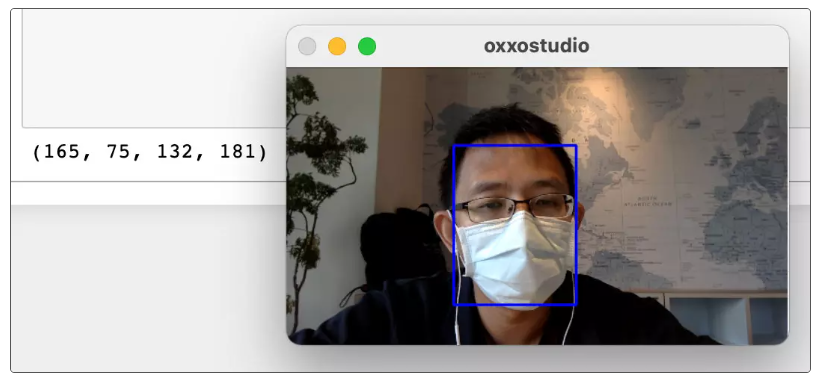

In [ ]:
import cv2

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    keyName = cv2.waitKey(1)
    # 按下 q 結束
    if keyName == ord('q'):
        break
    # 按下 a 開始選取
    if keyName == ord('a'):
        # 選取區域
        area = cv2.selectROI('oxxostudio', frame, showCrosshair=False, fromCenter=False)
        print(area)

    cv2.imshow('oxxostudio', frame)

cap.release()
cv2.destroyAllWindows()

##### 即時追蹤畫面中的特定物體 
透過 cv2.selectROI 方法取得區域位置和尺寸後，將位置和尺寸提交給透過 cv2.TrackerCSRT_create() 所創建的追蹤器，\
搭配 tracker.init 追蹤器初始化以及 tracker.update 追蹤器更新的方法，就能即時追蹤畫面中的特定物體。

下方的程式碼執行後，視窗中會看見攝影機的即時影像，按下鍵盤的 a 後影像會暫停，進入擷取模式，透過滑鼠拖曳出要追蹤的物件區域，\
按下 Enter 後就會出現紅色追蹤外框，開始追蹤特定的物件。

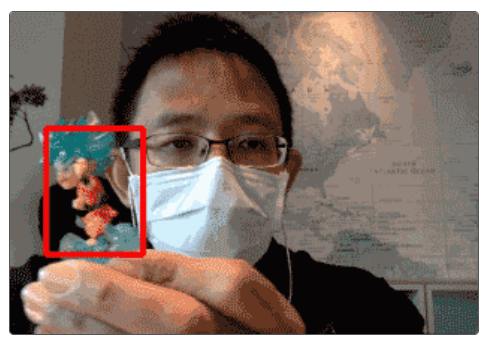

In [ ]:
import cv2

# 創建 CSRT 追蹤器
tracker = cv2.TrackerCSRT_create()

# 設定 False 表示尚未開始追蹤
tracking = False

# 開啟攝影機
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()

while True:
    # 讀取影像
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break

    # 縮小尺寸，加快速度
    frame = cv2.resize(frame, (1080, 720))

    # 讀取鍵盤輸入
    keyName = cv2.waitKey(1)

    # 按下 'q' 鍵退出
    if keyName == ord('q'):
        break

    # 按下 'a' 鍵選擇追蹤區域
    if keyName == ord('a'):
        # 選擇追蹤區域，參數說明：
        # 'oxxostudio' - 視窗名稱
        # frame - 當前影像
        # showCrosshair=False - 不顯示十字準心
        # fromCenter=False - 從左上角開始選擇區域
        area = cv2.selectROI('oxxostudio', frame, showCrosshair=False, fromCenter=False)
        
        # 初始化追蹤器
        tracker.init(frame, area)
        
        # 設定可以開始追蹤
        tracking = True

    # 如果正在追蹤
    if tracking:
        # 更新追蹤器，返回追蹤結果
        success, point = tracker.update(frame)
        
        # 如果追蹤成功
        if success:
            # 取得左上角座標
            p1 = (int(point[0]), int(point[1]))
            
            # 取得右下角座標
            p2 = (int(point[0] + point[2]), int(point[1] + point[3]))
            
            # 根據座標，繪製矩形框住要追蹤的物件
            cv2.rectangle(frame, p1, p2, (0, 0, 255), 3)

    # 顯示影像
    cv2.imshow('oxxostudio', frame)

# 釋放攝影機並關閉所有視窗
cap.release()
cv2.destroyAllWindows()